# Basic of Logistic

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
# Load data 
raw_data = pd.read_csv('2.01. Admittance.csv')

# Print 
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [3]:
# Create a new entry
data = raw_data.copy()

# Assign 1 to 'Yes' and 0 to 'No'
data['Admitted']  = data['Admitted'].map({'Yes':1, 'No':0})

# Check data
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Variables

In [4]:
# Assign data to variables Y
y = data['Admitted']

# Assign data to variables X
x1 = data['SAT'] 

## Let's plot the data

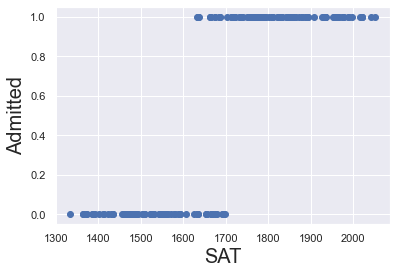

In [5]:
# Scatter plot creation

# Scatter parameters
plt.scatter(x1,y,color='C0')

# Scatter labels
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)

# Display table
plt.show()

### Plot with a regrssion line

C:\Users\serch\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


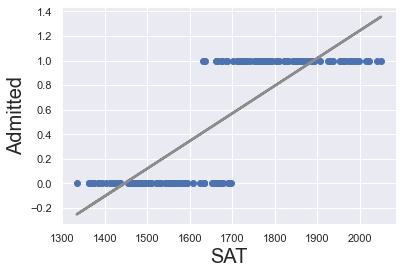

In [6]:
# Regression Line
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)

# Fit data
result_lin = reg_lin.fit()

# Sactter plot parameters
plt.scatter(x1,y,color = 'C0')

# Formula for y-hat
y_hat = x1 * result_lin.params[1] + result_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color = 'C7')

# Label of the chart
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)

# Display
plt.show()

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


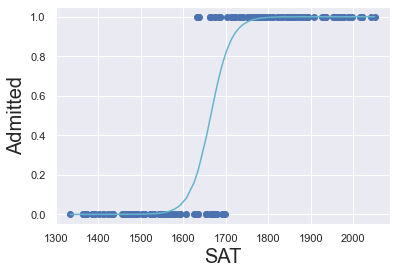

In [7]:
# Assign reg_log with the parameters
reg_log = sm.Logit(y,x)

# Fit results
results_log = reg_log.fit()

# Function for the array
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0 + x *b1)))
    
# Sorted values
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

# Create scatter plot

# Parameter in the scatter plot
plt.scatter(x1,y, color='C0')

# Label of the chart
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize=20)

plt.plot(x_sorted,f_sorted, color='C9')
plt.show()